In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [159]:
data = pd.read_csv('archive/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [116]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [117]:
data.shape

(41188, 21)

In [118]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [119]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [120]:
numeric_col = data.select_dtypes(include=np.number).columns.tolist()
categorical_col = data.select_dtypes(include='object').columns.tolist()

In [121]:
numeric_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [122]:
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

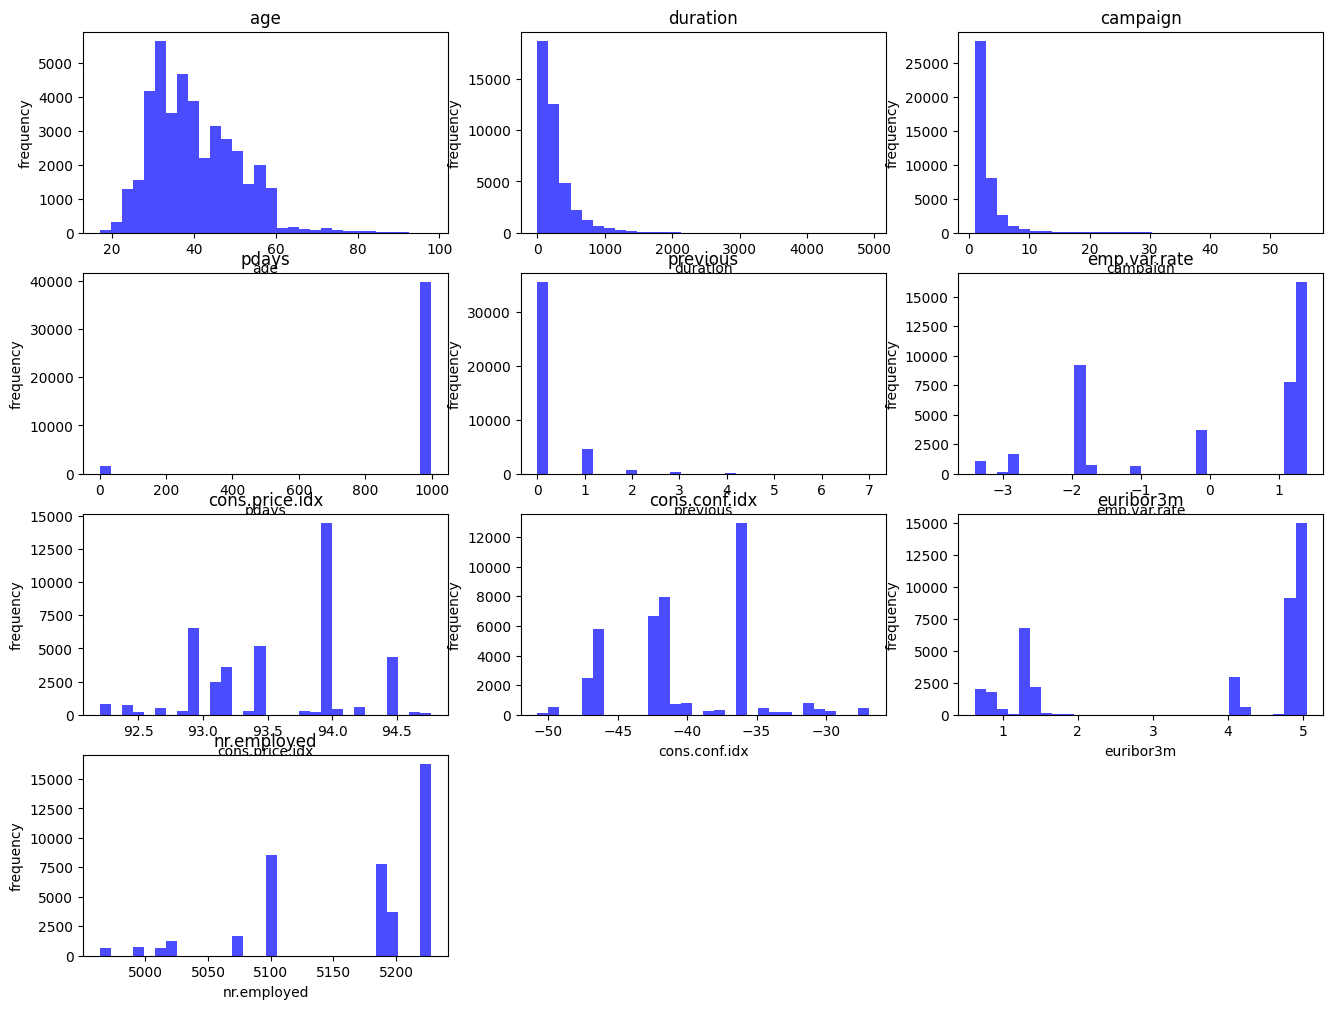

<Figure size 640x480 with 0 Axes>

In [123]:
plt.figure(figsize=(16,12))

for i,col in enumerate(numeric_col):
    plt.subplot(4,3,i+1)
    plt.hist(data[col], bins=30, color='blue', alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")
plt.show()
plt.tight_layout()

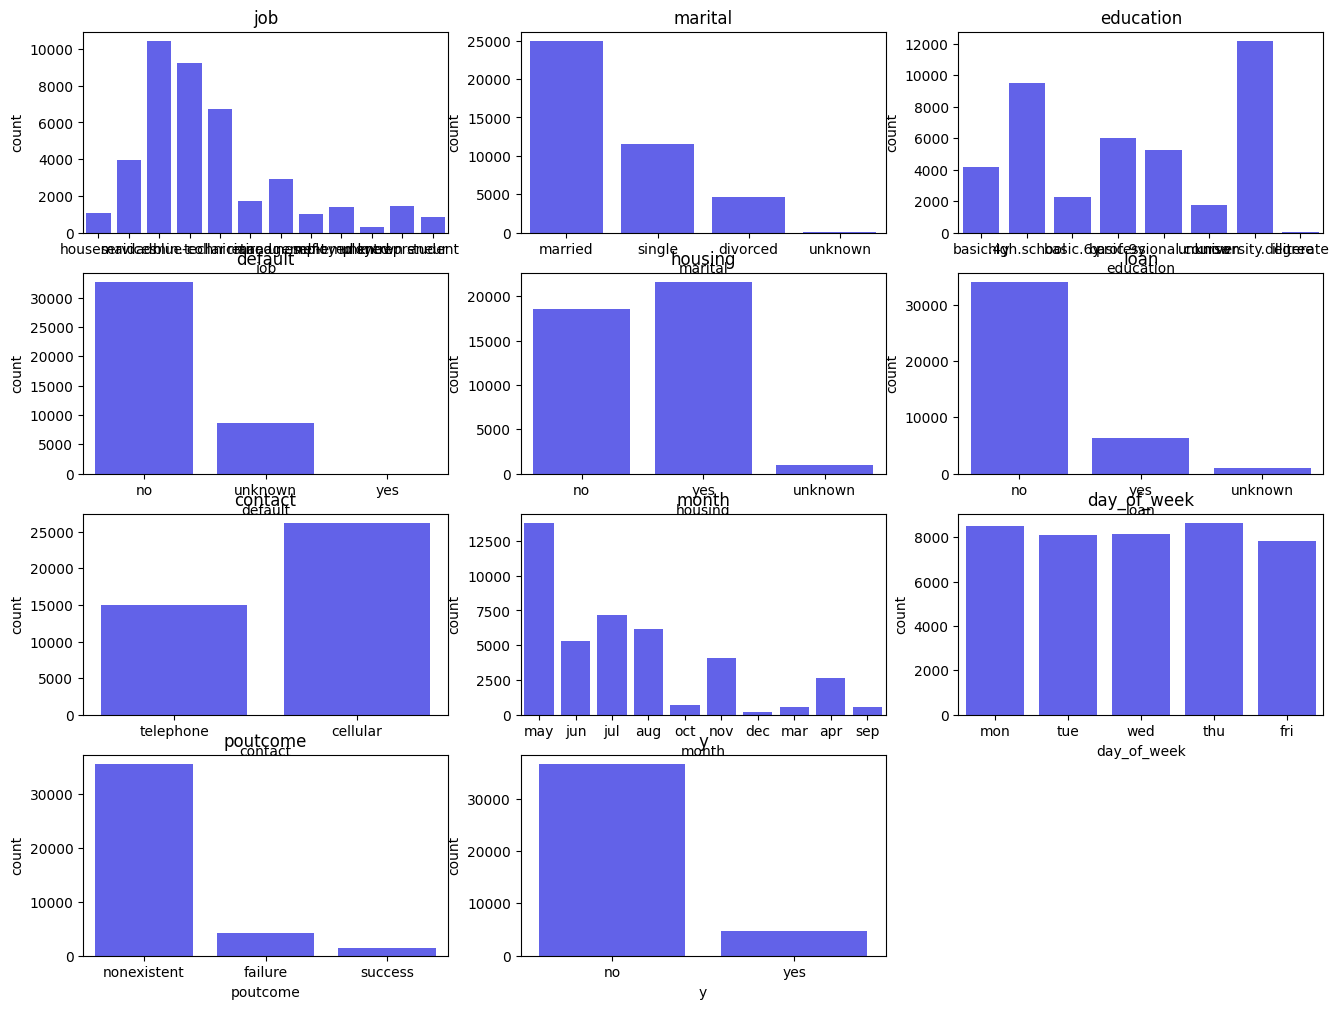

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize=(16,12))

for i,col in enumerate(categorical_col):
    plt.subplot(4,3,i+1)
    sns.countplot(x=col,data=data, color='blue', alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("count")
  

plt.show()
plt.tight_layout()    

In [125]:
corr = data[numeric_col].corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<Axes: >

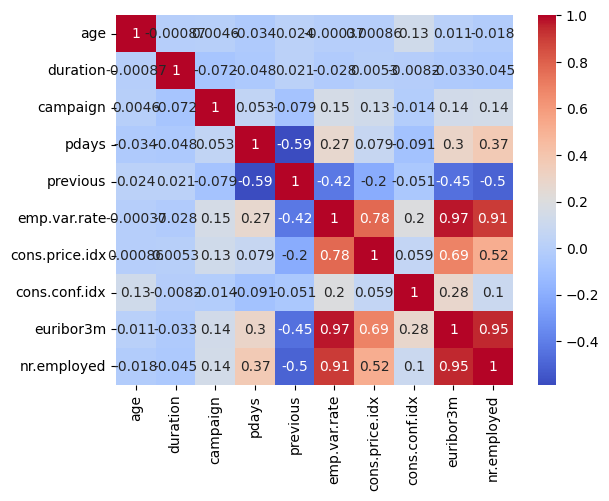

In [126]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [127]:
df = data.drop(columns=["duration"], errors="ignore")
df.shape

(41188, 20)

In [128]:
y = df["y"].map({"yes": 1, "no": 0})
X = df.drop(columns=["y"])

In [129]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [134]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

In [135]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score

In [137]:

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

In [138]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
    (
        "classifier", LogisticRegression(class_weight="balanced",max_iter=500,random_state=42)
    )]
)

In [139]:
clf.fit(X_train, y_train)

d:\bhaumik\ml_Task\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [161]:
y_prob = clf.predict_proba(X_test)[:,1]

In [162]:
y_prob

array([0.33601702, 0.81309311, 0.88813022, ..., 0.79582602, 0.15910753,
       0.36190909], shape=(8238,))

In [163]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.7981218895938487

In [164]:
k = round(0.10 * len(y_test)) 

In [167]:
top_k_idx = y_prob.argsort()[::-1][:k]
top_k_idx

array([3239, 4792, 3855,   21, 5000, 5826, 3949,  154, 6733, 3807, 1126,
       5647, 2837, 3490, 2057, 7146, 5874,  509, 4325, 1009, 7853, 3634,
       7127, 5010, 3733, 8061, 1093, 4698, 1950, 4848, 7730, 2421,  127,
       4500, 3706, 1560, 1785, 1749, 5455, 4127, 4542, 3014, 1775, 8072,
       1053, 4842,  826, 7474, 5422, 6871, 2737, 4887, 2212, 3272,  904,
       6212, 2610, 4038, 3538, 6180, 7666,  872, 4066, 6837, 5358, 2416,
       5623, 5074, 6075, 3020,  850, 3820, 2702, 6239,  311, 1185, 4169,
        100, 4571, 6571, 7005, 2301, 7867,   16,   87, 4458, 3399, 7437,
       5619, 6246,  428, 7116, 5904, 2827, 7560,  262, 6743,  150, 5462,
       3988, 6159, 1898, 4685, 3371, 6657,  782, 1242, 2272, 8039, 1083,
       5249, 4234, 2250, 1306, 3622, 6404, 5839, 4854,  384, 5682, 7933,
       6318, 4691, 7778,  745, 2478, 5896, 4122, 3447, 4635, 5066,  337,
       1734, 3660,  634, 2616, 3945, 5404, 5412, 2865,  941, 6018, 2933,
       1578, 7042, 1546, 2452, 7168, 2646, 3255, 51

In [168]:
top_k_precision = precision_score(y_test.iloc[top_k_idx], [1] * k)
top_k_precision


0.5

In [169]:
top15_idx = y_prob.argsort()[::-1][:15]
top15_idx

array([3239, 4792, 3855,   21, 5000, 5826, 3949,  154, 6733, 3807, 1126,
       5647, 2837, 3490, 2057])

In [172]:
top15_table = pd.DataFrame({
    "row_id": X_test.iloc[top15_idx].index,
    "predicted_prob": y_prob[top15_idx]
}).reset_index(drop=True)
top15_table

,row_id,predicted_prob
0,40276,0.980687
1,40078,0.978868
2,40173,0.977723
3,40450,0.977608
4,39153,0.976502
5,39976,0.976475
6,39911,0.976468
7,40040,0.975274
8,39340,0.975001
9,40160,0.974509
